In [1]:
from sigmf import SigMFFile, sigmffile
import matplotlib.pyplot as plt
import numpy as np


# Load a dataset
def sigmfPlot(filename):
#filename = 'Falkirk.sigmf-data' # extension is optional
    signal = sigmffile.fromfile(filename)

    # Get some metadata and all annotations
    sample_rate = signal.get_global_field(SigMFFile.SAMPLE_RATE_KEY)
    annotations = signal.get_annotations()

    for adx, annotation in enumerate(annotations):
        annotation_start_idx = annotation[SigMFFile.START_INDEX_KEY]
        annotation_length = annotation[SigMFFile.LENGTH_INDEX_KEY]
        annotation_comment = annotation.get(SigMFFile.COMMENT_KEY, "[annotation {}]".format(adx))

        # Get capture info associated with the start of annotation
        capture = signal.get_capture_info(annotation_start_idx)
        freq_center = capture.get(SigMFFile.FREQUENCY_KEY, 0)

        # Get frequency edges of annotation (default to edges of capture)
        freq_start = annotation.get(SigMFFile.FLO_KEY)
        freq_stop = annotation.get(SigMFFile.FHI_KEY)

        # Get the samples corresponding to annotation
        samples = signal.read_samples(annotation_start_idx, annotation_length)

        freq_axis = np.linspace(freq_start, freq_stop, num = annotation_length)
        plt.figure()
        plt.plot(freq_axis, samples, linewidth = 0.5)
        plt.show()
        
        

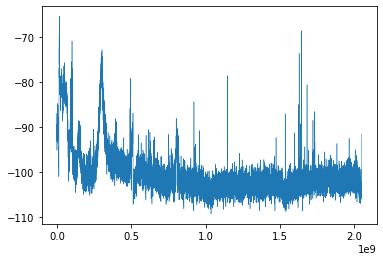

In [3]:
sigmfPlot("S_25-02-23_12")